# Face API Sample

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [2]:
subscription_key = 'af30cb4ec2a44010a054185e92b1a7bd'

In [3]:
face_api_url = 'https://daegufaceapi.cognitiveservices.azure.com/face/v1.0/detect'

In [4]:
image_url = 'http://cflove.org/warehouse/filemanager/PostImages/Face_Detection/coldFusion_face_detection_example_1.jpg'

In [5]:
image = Image.open(BytesIO(requests.get(image_url).content))

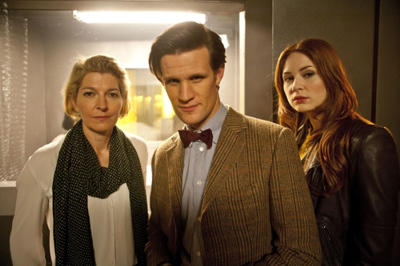

In [6]:
image

In [7]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}

In [8]:
params = {
    'returnFaceId' : 'true',
    'returnFacelandmarks' : 'false',
    'returnFaceAttributes' : 'age, gender, emotion'
}

In [9]:
data = {'url' : image_url}

In [10]:
response = requests.post(face_api_url, params = params, headers = headers, json = data)

In [11]:
faces = response.json()

In [12]:
faces

[{'faceId': '00a678f2-e047-41aa-a885-215c64e58a01',
  'faceRectangle': {'top': 64, 'left': 159, 'width': 57, 'height': 57},
  'faceAttributes': {'gender': 'male',
   'age': 33.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.014,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.426,
    'neutral': 0.558,
    'sadness': 0.001,
    'surprise': 0.0}}},
 {'faceId': '57343267-9fdc-4a4f-9704-b8ee6db65236',
  'faceRectangle': {'top': 80, 'left': 76, 'width': 49, 'height': 49},
  'faceAttributes': {'gender': 'female',
   'age': 48.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.022,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.109,
    'neutral': 0.869,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'e7b96b6f-e2b3-4c8d-b4ce-05366f79348f',
  'faceRectangle': {'top': 64, 'left': 277, 'width': 46, 'height': 46},
  'faceAttributes': {'gender': 'female',
   'age': 28.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happines

## 얼굴 이정표
[얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/concepts/face-detection)
![얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/images/landmarks.1.jpg)

In [13]:
def CreateImage(faces):
    
    for face in faces:
        
        # 사각형을 출력하기 위한 부분
        rect = face['faceRectangle']
        top = rect['top']
        left = rect['left']
        bottom = rect['height'] + top
        right = rect['width'] + left
        
        draw.rectangle(((left, top), (right, bottom)), outline = 'red')
        
        #글씨를 쓰기 위한 부분
        fontX = left
        fontY = top - 35
        
        face_info = face['faceAttributes']
        gender = face_info['gender']
        age = face_info['age']
        result = 'Gender: {0} \n Age : {1}'.format(gender, age)
        
        draw.text((fontX, fontY), result, fill = 'red')

In [14]:
draw = ImageDraw.Draw(image)

In [15]:
CreateImage(faces)

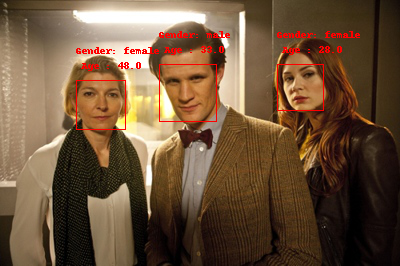

In [16]:
image